<a href="https://colab.research.google.com/github/asrianda/pemograman/blob/main/lat_cart/CART_ita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
data=pd.read_excel('Data Metode Cart.xlsx')
data.head()

,No,tahun,Kecamatan,Desa,K.T,Luas Tanam (Ha),Urea,SP-36,ZA,NPK,Organik,NPK Formula,Hasil Panen (Ton),Jumlah Bibit (Kg),Label
0,1,2020,Muara Satu,Meuriah Paloh,Tunas Muda,1.90,565,267,225,490,950,0,5.0,47.5,Rendah
1,2,2020,Muara Satu,Meuriah Paloh,Bina Alam Sejahtera,0.40,136,101,40,56,200,0,1.0,10.0,Rendah
2,3,2020,Muara Satu,Paloh Punti,Hidup Baru,19.70,3938,1474,1970,3940,9843,0,39.0,492.5,Rendah
3,4,2020,Muara Satu,Paloh Punti,Usaha Bersama,0.50,50,50,50,25,100,0,1.2,12.5,Rendah
4,5,2020,Muara Satu,Paloh Punti,Barona,1.08,178,104,116,254,492,0,10.0,27.0,Rendah


In [90]:
data.columns=data.columns.str.strip().str.replace(' ','_').str.lower()
data.head()

,no,tahun,kecamatan,desa,k.t,luas_tanam_(ha),urea,sp-36,za,npk,organik,npk_formula,hasil_panen_(ton),jumlah_bibit_(kg),label
0,1,2020,Muara Satu,Meuriah Paloh,Tunas Muda,1.90,565,267,225,490,950,0,5.0,47.5,Rendah
1,2,2020,Muara Satu,Meuriah Paloh,Bina Alam Sejahtera,0.40,136,101,40,56,200,0,1.0,10.0,Rendah
2,3,2020,Muara Satu,Paloh Punti,Hidup Baru,19.70,3938,1474,1970,3940,9843,0,39.0,492.5,Rendah
3,4,2020,Muara Satu,Paloh Punti,Usaha Bersama,0.50,50,50,50,25,100,0,1.2,12.5,Rendah
4,5,2020,Muara Satu,Paloh Punti,Barona,1.08,178,104,116,254,492,0,10.0,27.0,Rendah


In [91]:
values=[]
for i in data['luas_tanam_(ha)']:
  if pd.isna(i):
    values.append(0.0)
print(values)

[]


In [92]:
kosong=data.isnull().sum()
kosong.to_frame('count')

,count
no,0
tahun,0
kecamatan,0
desa,0
k.t,0
luas_tanam_(ha),0
urea,0
sp-36,0
za,0
npk,0


In [93]:
#-- Banyak Data dan Column --
data.shape

(145, 15)

In [94]:
#-- Tentutkan X dan y untuk menentukan kriteria dan labelnya --
X=data.loc[:,'luas_tanam_(ha)':'jumlah_bibit_(kg)']
y=data['label']
X

,luas_tanam_(ha),urea,sp-36,za,npk,organik,npk_formula,hasil_panen_(ton),jumlah_bibit_(kg)
0,1.90,565,267,225,490,950,0,5.0,47.5
1,0.40,136,101,40,56,200,0,1.0,10.0
2,19.70,3938,1474,1970,3940,9843,0,39.0,492.5
3,0.50,50,50,50,25,100,0,1.2,12.5
4,1.08,178,104,116,254,492,0,10.0,27.0
...,...,...,...,...,...,...,...,...,...
140,60.08,12842,0,0,14270,28540,0,132.0,1502.0
141,29.80,6724,0,0,7460,14900,0,60.0,745.0
142,11.56,2600,0,0,2890,5700,0,25.0,289.0
143,59.06,13288,0,0,14788,29530,0,130.0,1476.5


In [99]:
#-- Panggil Library untuk kebutuhan Decisin Tree --
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [100]:
#-- Split dataset untuk membagi data training dan data uji --
#-- Dendan Data Training 80% dan data Uji 20% --
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=1)

In [101]:
print(X_train.shape, X_test.shape)

(116, 9) (29, 9)


In [104]:
#-- Membuat Decision Tree dengan Gini Index --
#-- Menggunakan Decision Tree dengan kriteria pemisah Gini Impuriti --
#-- dengan kedalaman maksimum pohon =7 #--
clf_gini=DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=0)

#-- Fitkan model pohion --
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

[Text(0.65625, 0.9375, 'x[7] <= 47.85\ngini = 0.5\nsamples = 116\nvalue = [58, 58]'),
 Text(0.60625, 0.8125, 'x[7] <= 0.002\ngini = 0.462\nsamples = 91\nvalue = [33, 58]'),
 Text(0.55625, 0.6875, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.65625, 0.6875, 'x[7] <= 15.8\ngini = 0.433\nsamples = 85\nvalue = [27, 58]'),
 Text(0.4625, 0.5625, 'x[5] <= 3185.0\ngini = 0.328\nsamples = 58\nvalue = [12, 46]'),
 Text(0.325, 0.4375, 'x[7] <= 4.75\ngini = 0.483\nsamples = 27\nvalue = [11, 16]'),
 Text(0.2, 0.3125, 'x[4] <= 71.5\ngini = 0.346\nsamples = 18\nvalue = [4, 14]'),
 Text(0.1, 0.1875, 'x[1] <= 32.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.05, 0.0625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.15, 0.0625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3, 0.1875, 'x[2] <= 15.0\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(0.25, 0.0625, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.35, 0.0625, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text

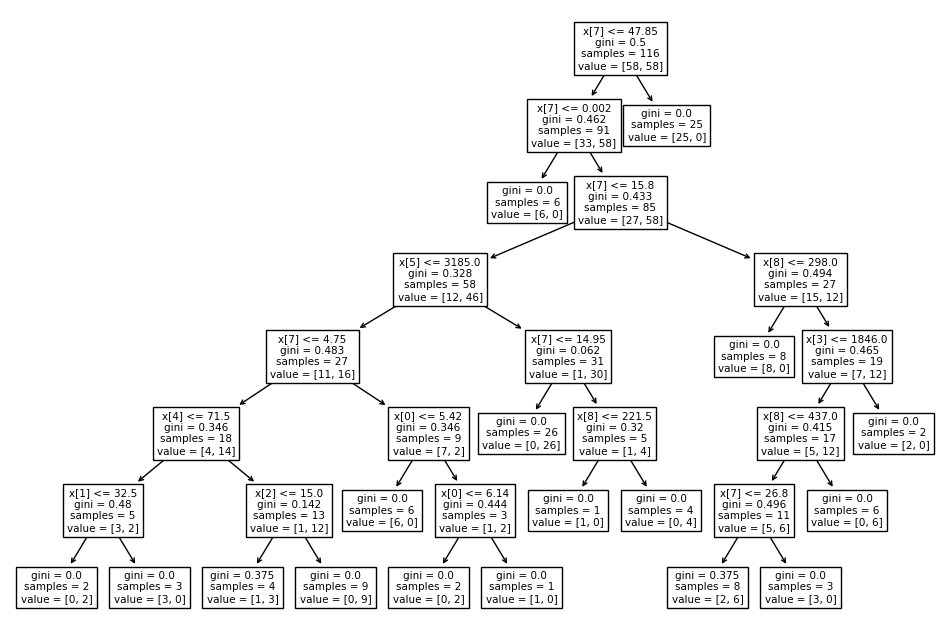

In [105]:
#-- Plot kan kedalam Tree-
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

Overfitting terjadi ketika akurasi set pelatihan tinggi dan set pengujian sangat rendah dibandingkan dengan set pelatihan. Overfitting adalah masalah yang sangat umum pada pohon keputusan.

In [108]:
#-- Melakukan Prediksi dengan data testing--
y_prediksi=clf_gini.predict(X_test)
y_prediksi

array(['Tinggi', 'Tinggi', 'Rendah', 'Rendah', 'Tinggi', 'Rendah',
       'Rendah', 'Tinggi', 'Tinggi', 'Tinggi', 'Tinggi', 'Rendah',
       'Rendah', 'Rendah', 'Rendah', 'Tinggi', 'Rendah', 'Rendah',
       'Tinggi', 'Tinggi', 'Rendah', 'Rendah', 'Rendah', 'Rendah',
       'Tinggi', 'Rendah', 'Rendah', 'Rendah', 'Tinggi'], dtype=object)

In [109]:
#-- Mealakukan prediksi untuk menentukan akurasi --
y_prediksi_training=clf_gini.predict(X_train)
y_prediksi_training

array(['Rendah', 'Rendah', 'Tinggi', 'Tinggi', 'Tinggi', 'Tinggi',
       'Tinggi', 'Rendah', 'Rendah', 'Tinggi', 'Tinggi', 'Rendah',
       'Tinggi', 'Rendah', 'Tinggi', 'Rendah', 'Rendah', 'Rendah',
       'Tinggi', 'Tinggi', 'Rendah', 'Tinggi', 'Rendah', 'Tinggi',
       'Tinggi', 'Tinggi', 'Tinggi', 'Rendah', 'Rendah', 'Tinggi',
       'Tinggi', 'Rendah', 'Rendah', 'Rendah', 'Tinggi', 'Rendah',
       'Tinggi', 'Tinggi', 'Tinggi', 'Rendah', 'Rendah', 'Rendah',
       'Rendah', 'Tinggi', 'Rendah', 'Tinggi', 'Rendah', 'Rendah',
       'Rendah', 'Tinggi', 'Tinggi', 'Tinggi', 'Tinggi', 'Rendah',
       'Tinggi', 'Tinggi', 'Rendah', 'Rendah', 'Tinggi', 'Rendah',
       'Rendah', 'Rendah', 'Rendah', 'Tinggi', 'Tinggi', 'Tinggi',
       'Tinggi', 'Rendah', 'Rendah', 'Tinggi', 'Tinggi', 'Tinggi',
       'Tinggi', 'Rendah', 'Tinggi', 'Rendah', 'Rendah', 'Tinggi',
       'Tinggi', 'Rendah', 'Rendah', 'Rendah', 'Rendah', 'Tinggi',
       'Rendah', 'Tinggi', 'Tinggi', 'Rendah', 'Tinggi', 'Rend

In [113]:
#-- Menentukan Skor Akurasi --
print('Skor Akurasi Model dengan Data Test Kriteria Gini Index : {0:0.4f}'.format(accuracy_score(y_test,y_prediksi)))
print('Skor Akurasi Data Pelatihan : {0:0.4f}'.format(accuracy_score(y_train,y_prediksi_training)))

Skor Akurasi Model dengan Data Test Kriteria Gini Index : 0.8276
Skor Akurasi Data Pelatihan : 0.9741


In [115]:
#-- Confusion Matrik ---
from sklearn.metrics import confusion_matrix, classification_report, f1_score
cm=confusion_matrix(y_test,y_prediksi)
print('Confusion Matric\n\n',cm)

Confusion Matric

 [[13  1]
 [ 4 11]]


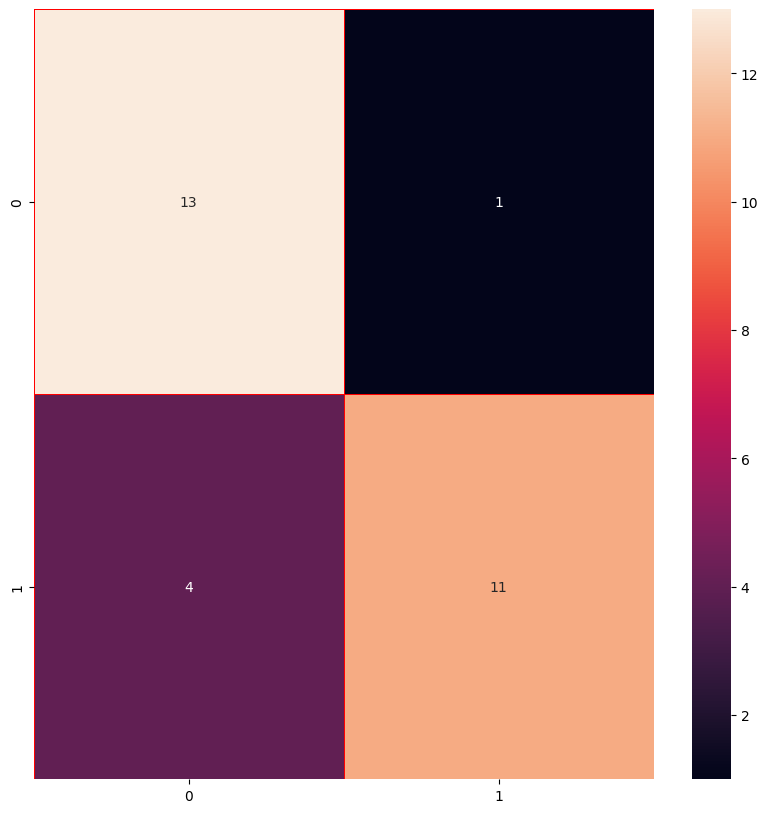

<Figure size 640x480 with 0 Axes>

In [120]:
#-- Grafiknya seperti berikut --\
import seaborn as sns
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True,linewidths=0.5, linecolor='red',fmt='.0f',ax=ax )
plt.show()
plt.savefig('CM.png')

In [121]:
print(classification_report(y_test,y_prediksi))

              precision    recall  f1-score   support

      Rendah       0.76      0.93      0.84        14
      Tinggi       0.92      0.73      0.81        15

    accuracy                           0.83        29
   macro avg       0.84      0.83      0.83        29
weighted avg       0.84      0.83      0.83        29

